In [209]:
# Initialize Otter
import otter
grader = otter.Notebook("projA1.ipynb")

# Project A1: Exploring Cook County Housing

## Due Date: Thursday, March 14th 11:59 PM PDT
You must submit this assignment to Gradescope by the on-time deadline, Thursday, March 14th at 11:59 PM. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted. **We strongly encourage you to plan to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for submission support. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance (TAs need to sleep, after all!).

Please read the instructions carefully when submitting your work to Gradescope. 


### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the project, we ask that you **write your solutions individually**. If you discuss the assignments with others, please **include their names** below.

**Collaborators:** *list names here*

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Mid-Semester Survey

Please fill out the mid-semester survey [here](https://forms.gle/HtQhxpQuTqByP94Y6). We appreciate your feedback! 

Note: The public test only checks if you enter the password in the correct format; it does not check if the password is correct.

In [210]:
qsurvey = "PpLAy6bhzc9R"

In [211]:
grader.check("qsurvey")

qsurvey results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />
<hr style="border: 5px solid #003262;" />
<br/><br/>

## Introduction

This project explores what can be learned from an extensive housing dataset that is embedded in a dense social context in Cook County, Illinois.

In Project A1 (this assignment), we will guide you through some basic Exploratory Data Analysis (EDA) to understand the structure of the data. Next, you will be adding a few new features to the dataset, while cleaning the data as well in the process.

In Project A2 (the following assignment), you will specify and fit a linear model for the purpose of prediction. Finally, we will analyze the error of the model and brainstorm ways to improve the model's performance.


## Grading
Grading is broken down into auto-graded answers and free responses. For auto-graded answers, the results of your code are compared to provided and/or hidden tests. For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question. 

### Score breakdown

Question | Manual | Points
----|----|----
1a | Yes | 1
1b | Yes | 1
1c | Yes | 1
1d | Yes | 1
2a | Yes | 1
2b | No | 1
3a | No | 1
3b | No | 1
3c | Yes | 1
4 | No | 2
5a | No | 1
5b | No | 2
5c | Yes | 2
6a | No | 1
6b | No | 2
6c | No | 2
6d | No | 1
7a | No | 1
7b | No | 2
Total | 7 | 25

## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Debugging Guide
If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Jupyter notebooks / Datahub, Gradescope, common `pandas` errors, RegEx, visualizations, and more.

In [212]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# The Data

The dataset consists of over 500,000 records from Cook County, Illinois, the county where Chicago is located. The dataset has 61 features in total; the 62nd is `Sale Price`, which you will predict with linear regression in the next part of this project. An explanation of each variable can be found in the included `codebook.txt` file (you can optionally open this by first clicking the `data` folder, then clicking `codebook.txt` file in the navigation pane). Some of the columns have been filtered out to ensure this assignment doesn't become overly long when dealing with data cleaning and formatting.

The data are split into training and test sets with 204,792 and 68,264 observations, respectively, but we will only be working on the training set for this part of the project.

Let's first extract the data from the `cook_county_data.zip`. Notice we didn't leave the `csv` files directly in the directory because they take up too much space without some prior compression. Just run the cells below: 

In [213]:
with zipfile.ZipFile('data/cook_county_data.zip') as item:
    item.extractall()

Let's load the initial data.

In [214]:
initial_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

As a good sanity check, we should at least verify that the data shape matches the description.

In [215]:
# 204,792 observations and 62 features in training data
assert initial_data.shape == (204792, 62)
# Sale Price is provided in the training data
assert 'Sale Price' in initial_data.columns.values

The next order of business is getting a feel for the variables in our data.  A more detailed description of each variable is included in `codebook.txt` (in the same directory as this notebook).  **You should take some time to familiarize yourself with the codebook before moving forward.**

Let's take a quick look at all the current columns in our initial data.

In [216]:
initial_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

In [217]:
initial_data['Description'][0]

'This property, sold on 09/14/2015, is a one-story houeshold located at 2950 S LYMAN ST.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 1: Contextualizing the Data

Although we've already explored this dataset and its social context in Lecture 15, let's refresh our memory on the background of our dataset before diving into a full-scale analysis. 

<!-- BEGIN QUESTION -->

<br><br>

---

## Question 1a

Based on the columns in this dataset and the values that they take, what do you think each row represents? That is, what is the granularity of this dataset? 

Each record of our dataframe represents a single home in Cook County, Illinois in Chicago, and its respective features - including information about the size of the land that the propertY is on, the garage space, building material, etc. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 1b
Why do you think this data was collected? For what purposes? By whom?

This question calls for your speculation and is looking for thoughtfulness, not correctness. 

The data was collected for the purpose of estimating home valuation, given that it was collected by the assessor's office in Cook County, which is a sociotechnical instituion that is responsible for valuating homes in the county. This was done for the purpose of estimating and assigning property tax rates that homeowners were expected to pay, on the basis of a property's value, and this value changes over time.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 1c

Craft at least two questions about housing in Cook County that can be answered with this dataset and provide the type of analytical tool you would use to answer it (e.g. "I would create a ___ plot of ___ and ___" or "I would calculate the ___ [summary statistic] for ___ and ____"). Be sure to reference the columns that you would use and any additional datasets you would need to answer that question.

I would create a bivariate kernal density estimate plot to explore relationships between pairs of variables such as the 'estimate(land)' and the 'neighborhood code' columns to answer how does housing size vary in each neighborhood of Cook County, Illinois?. A summary statistic that might be helpful would be looking at median prices of homes of specific neighborhoods based off of the 'most recent sale' column. This can answer a question like how much can we expect a house to cost in the county, or how are the prices distributed?  

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 1d

Suppose now, in addition to the information already contained in the dataset, you also have access to several new columns containing demographic data about the owner, including race/ethnicity, gender, age, annual income, and occupation. Provide one new question about housing in Cook County that can be answered using at least one column of demographic data and at least one column of existing data and provide the type of analytical tool you would use to answer it.

I think an interesting relationship worth exploring, given the extensive history of discriminatory practices in the U.S. housing market, would be using one hot encoding to regress on race/ethnicity and fit a linear regression model against the 'sale price' feature. Question: Does sale price vary for different racial/ethnic groups in the market for a home in Cook County, Illinois. 

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 2: Exploratory Data Analysis

This dataset was collected by the [Cook County Assessor's Office](https://datacatalog.cookcountyil.gov/Property-Taxation/Archive-Cook-County-Assessor-s-Residential-Sales-D/5pge-nu6u) in order to build a model to predict the monetary value of a home. You can read more about data collection in the CCAO’s [Residential Data Integrity Preliminary Report](https://gitlab.com/ccao-data-science---modeling/ccao_sf_cama_dev/-/blob/master/documentation/Preliminary%20Report%20on%20Data%20Integrity%20June%207,%202019.pdf). In Project A2, you will be building a linear regression model that predicts sales prices using training data, but it's important to first understand how the structure of the data informs such a model. In this section, we will make a series of exploratory visualizations and feature engineering in preparation for that prediction task.

Note that we will perform EDA on the **initial data**.

### Sale Price
We begin by examining the distribution of our target variable `Sale Price`. We have provided the following helper method `plot_distribution` that you can use to visualize the distribution of the `Sale Price` using both the histogram and the box plot at the same time. Run the following 2 cells.

In [218]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        x=data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)
    fig.suptitle("Distribution of " + label)

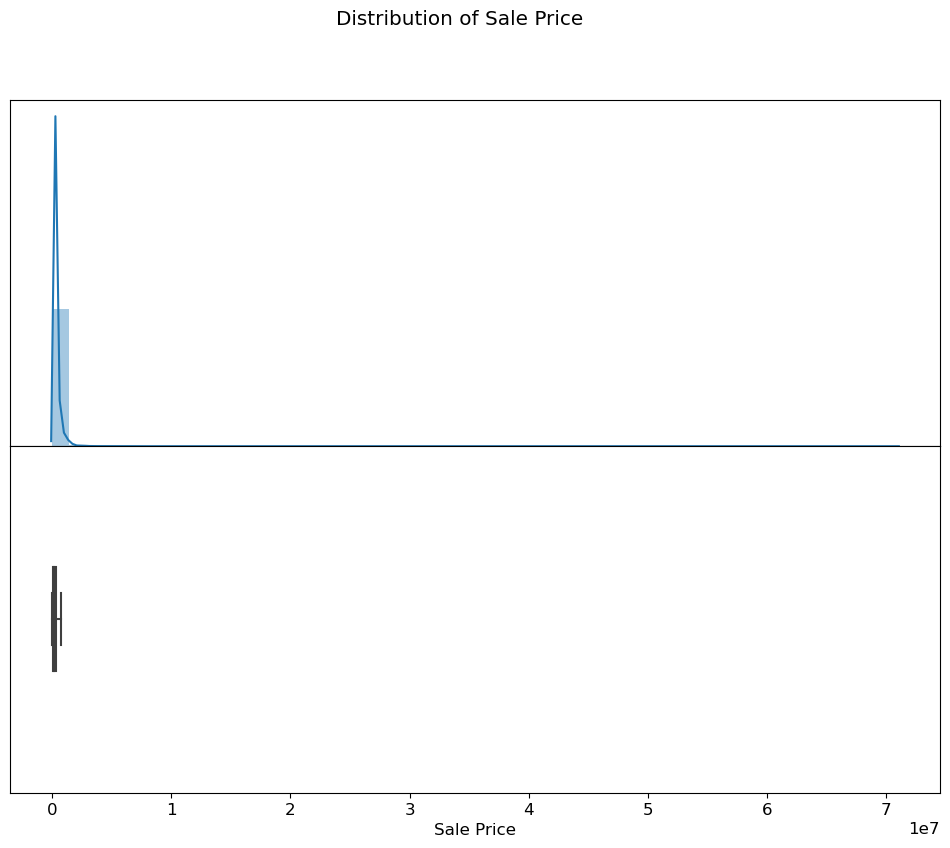

In [219]:
plot_distribution(initial_data, label='Sale Price')

At the same time, we also take a look at some descriptive statistics of this variable. Run the following cell.

In [220]:
initial_data['Sale Price'].describe()

count    2.047920e+05
mean     2.451646e+05
std      3.628694e+05
min      1.000000e+00
25%      4.520000e+04
50%      1.750000e+05
75%      3.120000e+05
max      7.100000e+07
Name: Sale Price, dtype: float64

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 2a

Using the plots and the descriptive statistics from `initial_data['Sale Price'].describe()` above, identify one issue with the visualization above and briefly describe one way to overcome it. 

Based on the plots above, the distribution of our 'Sale Price' data of homes in Cook County are skewed right, with the majority of our data points being scrunched up towards lower values. This can be attributed to outliers in our dataset. Applying a data transformation to this series can allow us to work with nicer, more symmetric data. And it would allow us to easier see if there are multiple peaks, rather one single peak as seen in the original distribution. Taking the log of our values to spread out the points also reduces the influence of outliers by bringing it closer to the mean.

<!-- END QUESTION -->



In [221]:
# optional cell for scratch work

<br><br>

---
## Question 2b

To zoom in on the visualization of most households, we will focus only on a subset of `Sale Price` for this assignment. In addition, it may be a good idea to apply a log transformation to `Sale Price`. In the cell below, assign `training_data` to a new `DataFrame` that is the same as `initial_data` **except with the following changes**:

- `training_data` should contain only households whose price is at least $500.
- `training_data` should contain a new `Log Sale Price` column that contains the log-transformed sale prices.

**You should NOT remove or modify the original column `Sale Price` as it will be helpful for later questions.** If you accidentally remove it, just restart your kernel and run the cells again.

**Note**: This also implies from now on, our target variable in the model will be the log-transformed sale prices from the column `Log Sale Price`. 

*To ensure that any error from this part does not propagate to later questions, there will be no hidden tests for this question.*

In [222]:
training_data = initial_data[initial_data['Sale Price']>= 500]
training_data['Log Sale Price'] = np.log(initial_data['Sale Price'])
training_data    

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,1,1.0,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,1,0.0,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,2,1.0,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,1,0.0,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705
6,30314240080000,203,181,10890.0,37,0.0,1.0,1.0,1.0,3.0,...,2,1.0,10.9,1,1.0,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204787,25163010260000,202,321,4375.0,72,0.0,2.0,1.0,1.0,1.0,...,2,0.0,5.8,1,1.0,321,72321,"This property, sold on 07/23/2014, is a one-st...",4375.0,10.521372
204788,5063010090000,204,21,16509.0,23,0.0,1.0,1.0,1.0,1.0,...,1,1.0,9.3,1,1.0,21,2321,"This property, sold on 03/27/2019, is a one-st...",16509.0,12.323856
204789,16333020150000,202,90,3810.0,15,0.0,2.0,1.0,1.0,1.0,...,1,1.0,5.9,1,1.0,90,1590,"This property, sold on 01/31/2014, is a one-st...",3810.0,11.813030
204790,9242030500000,203,80,6650.0,22,0.0,2.0,1.0,1.0,3.0,...,1,1.0,6.0,1,1.0,80,2280,"This property, sold on 02/22/2018, is a one-st...",6650.0,12.879017


In [223]:
grader.check("q2b")

q2b results: All test cases passed!

Let's create a new distribution plot using the log-transformed sale prices. As a sanity check, you should see that the distribution for `Log Scale Price` is much more uniform.

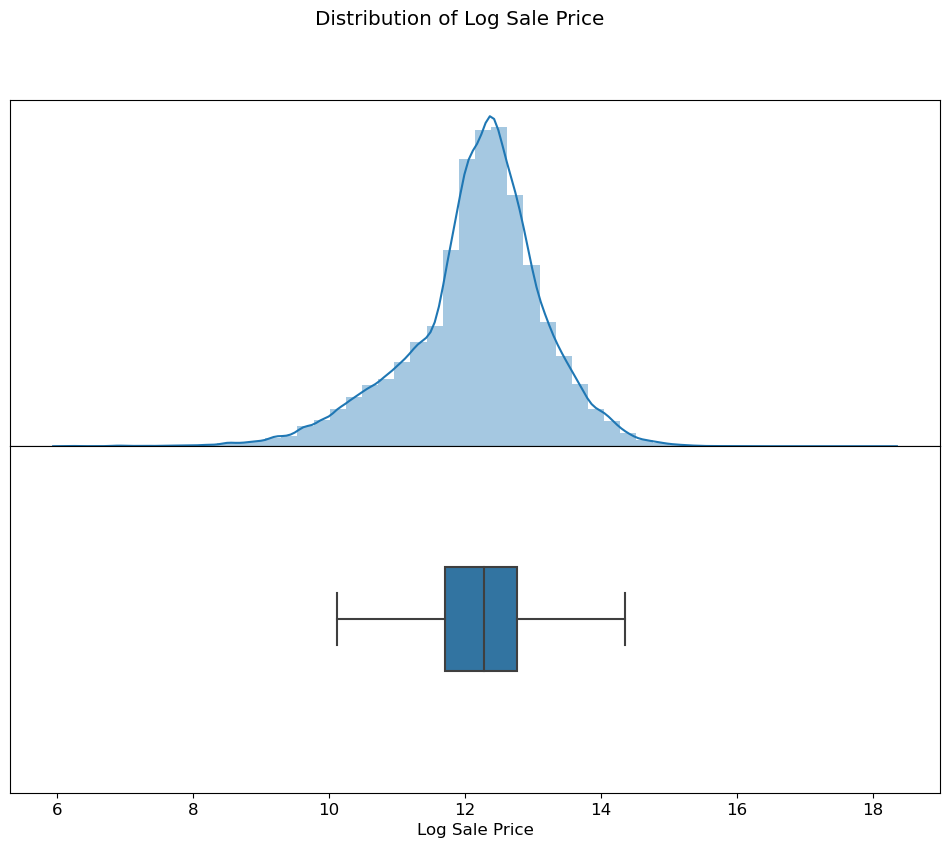

In [224]:
plot_distribution(training_data, label='Log Sale Price');

<br><br>

---
## Question 3a


Is the following statement correct? Assign your answer to `q3statement`.

     "At least 25% of the properties in the training set sold for more than $200,000.00."

**Note:** The provided test for this question does not confirm that you have answered correctly; only that you have assigned `q3statement` to `True` or `False`.

In [225]:
# This should be set to True or False
q3statement = False

In [226]:
grader.check("q3a")

q3a results: All test cases passed!

<br><br>

---
## Question 3b

Next, we want to explore if there is any correlation between `Log Sale Price` and the total area occupied by the property. The `codebook.txt` file tells us the column `Building Square Feet` should do the trick — it measures "(from the exterior) the total area, in square feet, occupied by the building".

Let's also apply a log transformation to the `Building Square Feet` column.

In the following cell, create a new column `Log Building Square Feet` in our `training_data` that contains the log-transformed area occupied by each property. 

**You should NOT remove or modify the original `Building Square Feet` column as it will be used for later questions**. If you accidentally remove it, just restart your kernel and run the cells again.

*To ensure that any errors from this part do not propagate to later questions, there will be no hidden tests for this question.*

In [227]:
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

In [228]:
grader.check("q3b")

q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 3c

In the visualization below, we created a `jointplot` with `Log Building Square Feet` on the x-axis, and `Log Sale Price` on the y-axis. In addition, we fit a simple linear regression line through the bivariate scatter plot in the middle.

Based on the following plot, would `Log Building Square Feet` make a good candidate as one of the features for our model? Why or why not?

**Hint:** To help answer this question, ask yourself: what kind of relationship does a “good” feature share with the target variable we aim to predict?

![Joint Plot](images/q2p3_jointplot.png)


The 'Log Building Square Feet' feature of our dataset is a good candidate for our model because of the strong positive correlation with the 'Log Sale Price'. Overplotting is evident because we have lots of data we're working with, but it is easy to see the clear association between our predictor and target variable.

<!-- END QUESTION -->

<br><br>

---
## Question 4

Continuing from the previous part, as you explore the dataset, you might still run into more outliers that prevent you from creating a clear visualization or capturing the trend of the majority of the houses. 

Write a function `remove_outliers` that removes outliers from the dataset based on a threshold value of a variable. For example, `remove_outliers(training_data, 'Building Square Feet', lower=500, upper=8000)` should return a copy of `data` with only observations that satisfy `Building Square Feet` less than or equal to 8000 (inclusive) and `Building Square Feet` greater than 500 (inclusive).

**Note:** The provided tests simply check that the `remove_outliers` function you defined does not mutate the input data in-place. They do not check that you have implemented `remove_outliers` correctly so that it works with any data, variable, lower, and upper bound.

In [229]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (DataFrame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than or equal to this will be removed
      upper (numeric): observations with values higher than or equal to this will be removed
    
    Output:
      a DataFrame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    data = data[(data[variable] >= lower) & (data[variable] <= upper)]
    
    return data

In [230]:
grader.check("q4")

q4 results: All test cases passed!

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 3: Feature Engineering

In this section, we will walk you through a few feature engineering techniques. 

### Bedrooms

Let's start simple by extracting the total number of bedrooms as our first feature for the model. You may notice that the `Bedrooms` column doesn't actually exist in the original `DataFrame`! Instead, it is part of the `Description` column.

<br><br>

---
## Question 5a

Let's take a closer look at the `Description` column first. Compare the description for a few rows. For the following list of variables, how many of them can be extracted from the `Description` column? Assign your answer to a list of integers corresponding to the statements that you think are true (ie. `[1, 2, 3]`).

1. The date the property was sold on.
2. The number of stories the property contains.
3. The previous owner of the property.
4. The address of the property.
5. The number of garages the property has.
6. The total number of rooms inside the property.
7. The total number of bedrooms inside the property.
8. The total number of bathrooms inside the property.

In [231]:
# optional cell for scratch work 

In [232]:
q5a = [1,2,4,6,7,8]

In [233]:
grader.check("q5a")

q5a results: All test cases passed!

In [234]:
import re 
pattern = r'(\w+\s\w+\s\w+\s\w+\sbedroom)'
training_data['Description'].str.findall(pattern)

1         [3 of which are bedroom]
2         [3 of which are bedroom]
3         [3 of which are bedroom]
4         [2 of which are bedroom]
6         [4 of which are bedroom]
                    ...           
204787    [2 of which are bedroom]
204788    [4 of which are bedroom]
204789    [3 of which are bedroom]
204790    [3 of which are bedroom]
204791    [2 of which are bedroom]
Name: Description, Length: 168931, dtype: object

<br><br>

---
## Question 5b

Write a function `add_total_bedrooms(data)` that returns a copy of `data` with an additional column called `Bedrooms` that contains the total number of bedrooms (**as integers**) for each house. Treat missing values as zeros, if necessary. Remember that you can make use of vectorized code here; you shouldn't need any `for` statements. 

**Hint**: You should consider inspecting the `Description` column to figure out if there is any general structure within the text. Once you have noticed a certain pattern, you are set with the power of RegEx!

In [235]:
def add_total_bedrooms(data):
    """
    Input:
      data (DataFrame): a DataFrame containing at least the Description column.

    Output:
      a Dataframe with a new column "Bedrooms" containing ints.

    """
    with_rooms = data.copy()
    pattern = r'(\w+\s)\w+\s\w+\s\w+\sbedrooms'
    with_rooms['Bedrooms'] = with_rooms['Description'].str.findall(pattern).str[0].astype('int')
    return with_rooms

training_data = add_total_bedrooms(training_data)
training_data.fillna(value=0, inplace=True)
training_data

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,3
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,3
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,2
6,30314240080000,203,181,10890.0,37,0.0,1.0,1.0,1.0,3.0,...,10.9,1,1.0,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925,7.458186,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204787,25163010260000,202,321,4375.0,72,0.0,2.0,1.0,1.0,1.0,...,5.8,1,1.0,321,72321,"This property, sold on 07/23/2014, is a one-st...",4375.0,10.521372,6.813445,2
204788,5063010090000,204,21,16509.0,23,0.0,1.0,1.0,1.0,1.0,...,9.3,1,1.0,21,2321,"This property, sold on 03/27/2019, is a one-st...",16509.0,12.323856,7.603399,4
204789,16333020150000,202,90,3810.0,15,0.0,2.0,1.0,1.0,1.0,...,5.9,1,1.0,90,1590,"This property, sold on 01/31/2014, is a one-st...",3810.0,11.813030,6.815640,3
204790,9242030500000,203,80,6650.0,22,0.0,2.0,1.0,1.0,3.0,...,6.0,1,1.0,80,2280,"This property, sold on 02/22/2018, is a one-st...",6650.0,12.879017,7.092574,3


In [236]:
grader.check("q5b")

q5b results: All test cases passed!

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 5c

Create a visualization that clearly and succinctly shows if there exists an association between  `Bedrooms` and `Log Sale Price`. A good visualization should satisfy the following requirements:
- It should avoid overplotting.
- It should have clearly labeled axes and a succinct title.
- It should convey the strength of the correlation between `Sale Price` and the number of rooms: in other words, you should be able to look at the plot and describe the general relationship between `Log Sale Price` and `Bedrooms`.

**Hint**: A direct scatter plot of the `Sale Price` against the number of rooms for all of the households in our training data might risk overplotting.

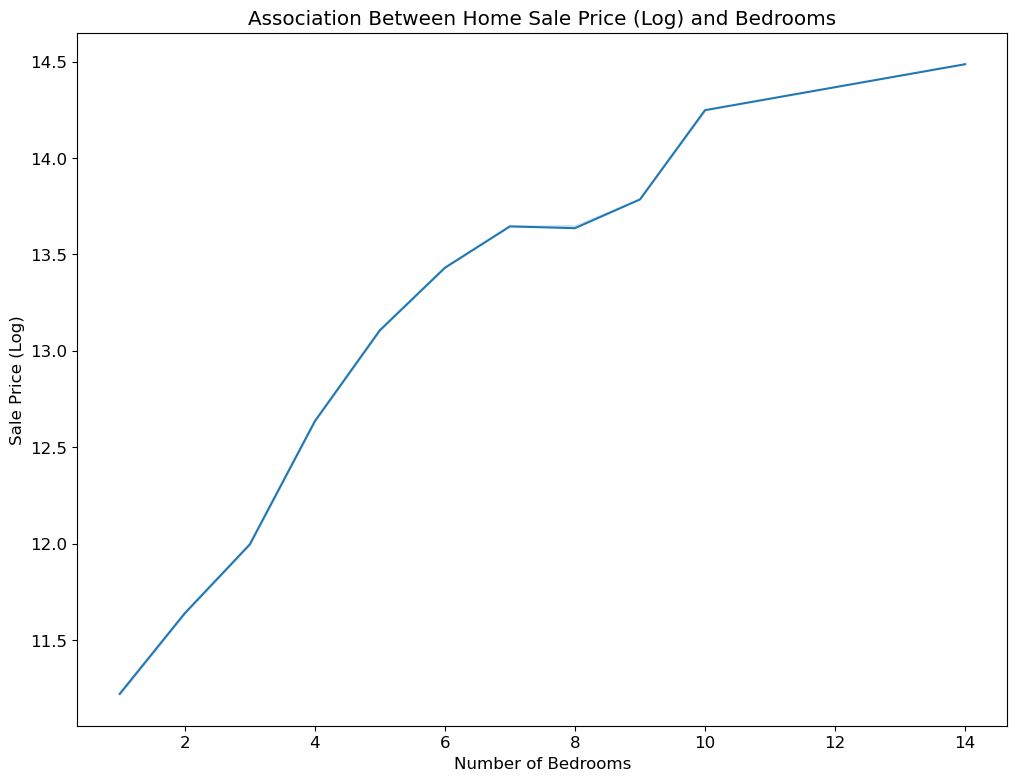

In [237]:
sns.lineplot(data=training_data, x= 'Bedrooms', y='Log Sale Price',ci=False)
plt.title('Association Between Home Sale Price (Log) and Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price (Log)');

<!-- END QUESTION -->

Now, let's take a look at the relationship between neighborhood and sale prices of the houses in our dataset.
Notice that currently we don't have the actual names for the neighborhoods. Instead we will use a similar column, `Neighborhood Code` (which is a numerical encoding of the actual neighborhoods by the Assessment office).

<br><br>

---
## Question 6a

Before creating any visualization, let's quickly inspect how many different neighborhoods we are dealing with.

Assign the variable `num_neighborhoods` to the total number of unique neighborhoods in `training_data`. 


In [238]:
num_neighborhoods = len(training_data['Neighborhood Code'].unique())
num_neighborhoods

193

In [239]:
grader.check("q6a")

q6a results: All test cases passed!

<br><br>

---
## Question 6b

If we try directly plotting the distribution of `Log Sale Price` for all of the households in each neighborhood using the `plot_categorical` function from the next cell, we get the following visualization.


![overplot](images/q5p2_catplot.png)


In [240]:
# Feel free to create a cell below this and run plot_cateogrical(training_data) if you want to see what this function outputs.
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Neighborhood Code',
        y='Log Sale Price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='Neighborhood Code',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=training_data['Log Sale Price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

Oh no, looks like we have run into the problem of overplotting again! 

You might have noticed that the graph is overplotted because **there are actually quite a few neighborhoods in our dataset**! For the clarity of our visualization, we will have to zoom in again on a few of them. The reason for this is our visualization will become quite cluttered with a super dense x-axis.

Assign the variable `in_top_20_neighborhoods` to a copy of `training_data` that has been filtered to only contain rows corresponding to properties that are in one of the top 20 most populous neighborhoods. We define the top 20 neighborhoods as being the 20 neighborhood codes that have the greatest number of properties within them.

In [241]:
top_20_neighborhood_codes = training_data['Neighborhood Code'].value_counts().sort_values(ascending=False)
in_top_20_neighborhoods = training_data[training_data['Neighborhood Code'].isin(top_20_neighborhood_codes.head(20).index)]
in_top_20_neighborhoods

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,2
8,13232040260000,205,70,3100.0,71,0.0,2.0,2.0,1.0,3.0,...,10.0,1,1.0,70,7170,"This property, sold on 08/25/2016, is a two-st...",3100.0,13.422468,7.636270,4
10,19074270080000,202,380,3750.0,72,0.0,1.0,1.0,2.0,3.0,...,7.4,1,1.0,380,72380,"This property, sold on 05/01/2017, is a one-st...",3750.0,11.695247,6.841615,2
11,15083050330000,203,20,5092.0,31,0.0,2.0,1.0,1.0,1.0,...,5.8,1,1.0,20,3120,"This property, sold on 04/29/2014, is a one-st...",5092.0,11.184421,6.911747,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204781,20361190390000,203,80,4405.0,70,0.0,2.0,1.0,1.0,3.0,...,5.7,1,1.0,80,7080,"This property, sold on 07/15/2013, is a one-st...",4405.0,10.913269,7.141245,3
204785,9284030280000,202,40,6650.0,22,0.0,1.0,1.0,1.0,3.0,...,6.1,1,1.0,40,2240,"This property, sold on 04/03/2014, is a one-st...",6650.0,11.736069,6.761573,3
204786,8141120110000,203,100,10010.0,16,0.0,2.0,1.0,1.0,1.0,...,5.6,1,1.0,100,16100,"This property, sold on 09/08/2016, is a one-st...",10010.0,12.568978,6.948897,3
204790,9242030500000,203,80,6650.0,22,0.0,2.0,1.0,1.0,3.0,...,6.0,1,1.0,80,2280,"This property, sold on 02/22/2018, is a one-st...",6650.0,12.879017,7.092574,3


In [242]:
grader.check("q6b")

q6b results: All test cases passed!

Let's create another of the distribution of sale price within in each neighborhood again, but this time with a narrower focus!

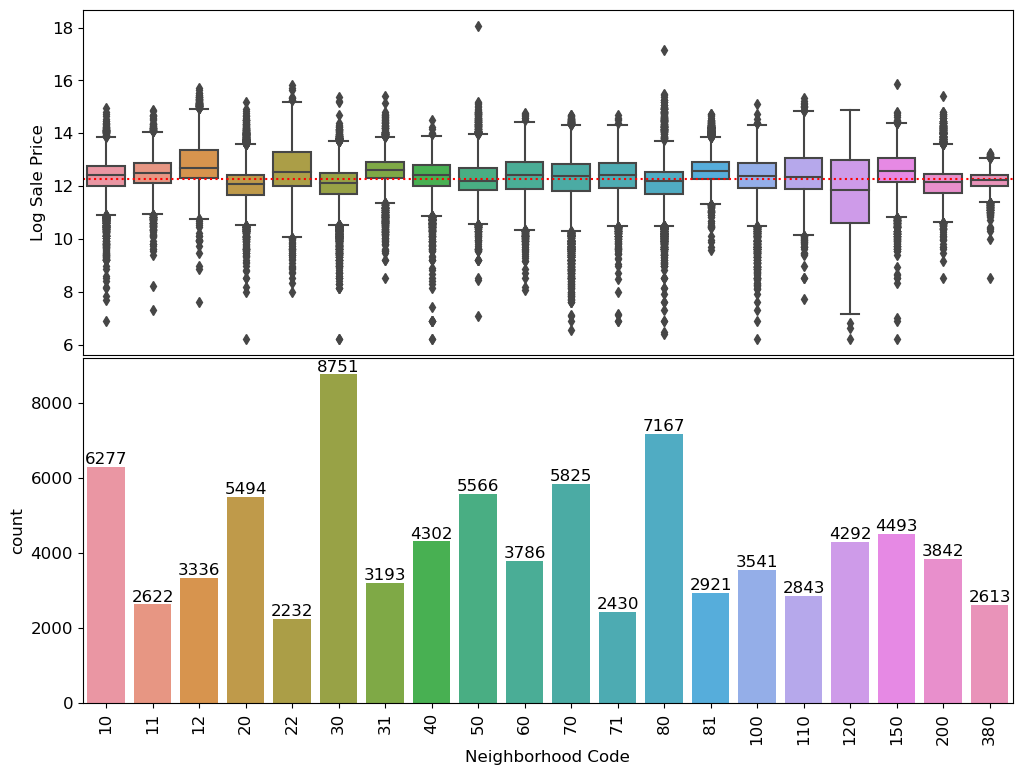

In [243]:
plot_categorical(neighborhoods=in_top_20_neighborhoods)

<br><br>

---
## Question 6c

From the plot above, we can see that there is much less data available for some neighborhoods. For example, Neighborhood 71 has only around 27% of the number of datapoints as Neighborhood 30.

One way we can deal with the lack of data from some neighborhoods is to create a new feature that bins neighborhoods together. We’ll categorize our neighborhoods in a crude way. In this question, we’ll compute how “expensive” each neighborhood is by aggregating the `Log Sale Price`s for all properties in a particular neighborhood using a `metric`, such as the median. We’ll use this `metric` to find the top `n` most expensive neighborhoods. Then, in `q6d`, we’ll label these “expensive neighborhoods” and leave all other neighborhoods unmarked.

Fill in `find_expensive_neighborhoods` to return a **list** of the neighborhood codes of the **top `n`** most expensive neighborhoods as measured by our choice of aggregating function, `metric`.

For example, calling `find_expensive_neighborhoods(training_data, n=3, metric=np.median)` should return the 3 neighborhood codes with the highest median `Log Sale Price` computed across all properties in those neighborhood codes. 

In [244]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (DataFrame): should contain at least an int-valued 'Neighborhood Code'
        and a numeric 'Log Sale Price' column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the the neighborhood codes of the top n highest-priced neighborhoods 
      as measured by the metric function
    """
    neighborhoods = list(data.groupby('Neighborhood Code')['Log Sale Price'].agg(metric).sort_values(ascending=False).index[:n])
    
    # This makes sure the final list contains the generic int type used in Python3, not specific ones used in NumPy.
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhoods

[44, 94, 93]

In [245]:
grader.check("q6c")

q6c results: All test cases passed!

<br><br>

---
## Question 6d

We now have a list of neighborhoods we've deemed as higher-priced than others.  Let's use that information to write an additional function `add_expensive_neighborhood` that takes in a `DataFrame` of housing data (`data`) and a list of neighborhood codes considered to be expensive (`expensive_neighborhoods`). You can think of `expensive_neighborhoods` as being the output of the function `find_expensive_neighborhoods` from `q6c`. 

Using these inputs, `add_expensive_neighborhood` should add a column to `data` named `in_expensive_neighborhood` that takes on the **integer** value of 1 if a property is part of a neighborhood in `expensive_neighborhoods` and the integer value of 0 if it is not. This type of variable is known as an **indicator variable**.

**Hint:** `pd.Series.astype` [(documentation)](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.astype.html) may be useful for converting `True`/`False` values to integers.

In [246]:
def add_in_expensive_neighborhood(data, expensive_neighborhoods):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Neighborhood Code' column with values
        found in the codebook
      expensive_neighborhoods (list of ints): ints should be the neighborhood codes of
        neighborhoods pre-identified as expensive
    Output:
      DataFrame identical to the input with the addition of a binary
      in_expensive_neighborhood column
    """
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(expensive_neighborhoods).astype('int')
    return data

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
training_data = add_in_expensive_neighborhood(training_data, expensive_neighborhoods)

In [247]:
grader.check("q6d")

q6d results: All test cases passed!

In the following question, we will take a closer look at the `Roof Material` feature of the dataset and examine how we can incorporate categorical features into our linear model.

<br><br>

---
## Question 7a

If we look at `codebook.txt` carefully, we can see that the Assessor's Office uses the following mapping for the numerical values in the `Roof Material` column.
```
Roof Material (Nominal): 

       1    Shingle/Asphalt
       2    Tar & Gravel
       3    Slate
       4    Shake
       5    Tile
       6    Other
```

Write a function `substitute_roof_material` that replaces each numerical value in `Roof Material` with their corresponding roof material. Your function should return a new `DataFrame`, not modify the existing `DataFrame`. If you modify the existing `DataFrame` by accident, you can load `training_data` again in `q2b`.

**Hint**: the `DataFrame.replace` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)) method may be useful here.

In [248]:
def substitute_roof_material(data):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Roof Material' column.  Its values
                         should be limited to those found in the codebook
    Output:
      new DataFrame identical to the input except with a refactored 'Roof Material' column
    """
    new_data= data.replace({'Roof Material': {1:'Shingle/Asphalt', 2:'Tar & Gravel', 3: 'Slate', 4: 'Shake', 5: 'Tile', 6: 'Other'}})
    return new_data
    
training_data_mapped = substitute_roof_material(training_data)
training_data.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms,in_expensive_neighborhood
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3,0
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,3,0
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,3,0
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,2,0
6,30314240080000,203,181,10890.0,37,0.0,1.0,1.0,1.0,3.0,...,1,1.0,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925,7.458186,4,0


In [249]:
grader.check("q7a")

q7a results: All test cases passed!

<br><br>

---
## Question 7b

#### An Important Note on One-Hot-Encoding 

Unfortunately, simply replacing the integers with the appropriate strings isn’t sufficient for using `Roof Material` in our model.  Since `Roof Material` is a categorical variable, we will have to one-hot-encode the data. For more information on why we want to use one-hot-encoding, refer to this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

Complete the following function `ohe_roof_material` that returns a `DataFrame` with the new column one-hot-encoded on the roof material of the household. These new columns should have the form `Roof Material_MATERIAL`. Your function should return a new `DataFrame` and **should not modify the existing `DataFrame`**.

You should use `scikit-learn`’s `OneHotEncoder` to perform the one-hot-encoding. `OneHotEncoder` will automatically generate column names of the form `Roof Material_MATERIAL`. Refer back to the video walkthrough for Question 1 of Lab 7 for an example of its use. Unlike in the lab example however, in this problem we only wish to construct the one-hot-encoding columns **without removing any columns**.

In [250]:
from sklearn.preprocessing import OneHotEncoder

def ohe_roof_material(data):
    """
    One-hot-encodes roof material. New columns are of the form "Roof Material_MATERIAL".
    """
    ohe = OneHotEncoder()
    ohe.fit(data[['Roof Material']])
    encoded_material = ohe.transform(data[['Roof Material']]).toarray()
    encoded_material_df = pd.DataFrame(encoded_material, columns = ohe.get_feature_names_out())
    df = data.join(encoded_material_df)
    return df

training_data_ohe = ohe_roof_material(training_data_mapped)
# This line of code will display only the one-hot-encoded columns in training_data_ohe that 
# have names that begin with “Roof Material_" 
training_data_ohe.filter(regex='^Roof Material_').head(10)

,Roof Material_Other,Roof Material_Shake,Roof Material_Shingle/Asphalt,Roof Material_Slate,Roof Material_Tar & Gravel,Roof Material_Tile
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0


In [251]:
grader.check("q7b")

q7b results: All test cases passed!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Mimi and Pishi congratulate you for finishing Project A1!

<div align="middle">
    <table style="width:100%">
      <tr align="center">
        <td><img src="images/mimi.jpg" align="middle" width="200vw" />
        </td>
        <td><img src="images/pishi.jpg" align="middle" width="300vw" />
      </tr>
    </table>
  </div>

What's next? In Project A2, you will focus on building a linear regression model to predict house prices. You will be well-prepared to build such a model: you have considered what is in this dataset, what it can be used for, and engineered some features that should be useful for prediction. As we look into creating a house-pricing model for Cook County, we'll also consider some challenging social implications touched on in Lecture 15 that this model may carry. 

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSe0fBEJwt6aEfZxU3fh3llNk8rSWHj6Umq0km3wPqmFu0MlGA/viewform). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the Project A1 Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the Project A1 Written assignment. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

If there are issues with automatically generating the PDF, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> PDF`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit those. 

**You are responsible for ensuring your submission follows our requirements, that the PDF for Proj A1 written answers was generated/submitted correctly, and that the file was submitted to the correct assignment. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline. 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)